In [1]:
# Imports
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

from PIL import Image

In [2]:
def read_images():
    # Diretório principal
    base_dir = '../images-processed/'

    # Dicionário para armazenar imagens por pasta
    image_data = {}

    # Percorra as pastas dentro do diretório base
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        
        # Verifique se é uma pasta
        if os.path.isdir(folder_path):
            images = []
            
            # Percorra os arquivos de imagem na pasta
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                
                # Verifique se o arquivo é uma imagem
                if file_path.lower().endswith(('.png', '.jpg')):
                    image = Image.open(file_path)
                    images.append(image)
            
            # Adicione a lista de imagens ao dicionário
            image_data[folder] = images
    return image_data

In [3]:
def convert_to_grayscale_with_histogram_equalization(image_data):
    grayscale_data = {}

    for folder, images in image_data.items():
        grayscale_images = []

        for image in images:
            # Converter a imagem PIL para numpy array
            image_np = np.array(image)

            # Converter a imagem para tons de cinza
            gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

            # Aplicar a equalização de histograma
            equalized_image = cv2.equalizeHist(gray_image)
            grayscale_images.append(equalized_image)

        grayscale_data[folder] = grayscale_images

    return grayscale_data

In [4]:
def display_images(data, num_images_to_display=10):
    for folder, images in data.items():
        print(f"Folder: {folder}")
        num_images = len(images)
        
        for i in range(0, num_images, num_images_to_display):
            fig, axes = plt.subplots(1, min(num_images_to_display, num_images - i), figsize=(15, 5))
            
            if num_images_to_display == 1:
                axes = [axes]  # Tratar o caso de exibição de uma única imagem
                
            for j, ax in enumerate(axes):
                if j + i < num_images:
                    ax.imshow(images[i + j], cmap='gray')
                    ax.axis('off')
            
            plt.show()

In [8]:
def segmentation(grayscale_images):
    segmented_and_labeled_images = {}
    
    for folder, images in grayscale_images.items():
        segmented_image_list = []
        
        for image in images:
            # Segmentar a imagem em tons de cinza usando uma máscara
            _, segmented_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            segmented_image_list.append(segmented_image)
        
        segmented_and_labeled_images[folder] = segmented_image_list
    
    return segmented_and_labeled_images

In [ ]:
image_data = read_images()
grayscale_image_data = convert_to_grayscale_with_histogram_equalization(image_data=image_data)
segmented_nuclei_data = segmentation(grayscale_image_data)
display_images(segmented_nuclei_data, num_images_to_display=20)

AQUI E TESTE ABAIXO

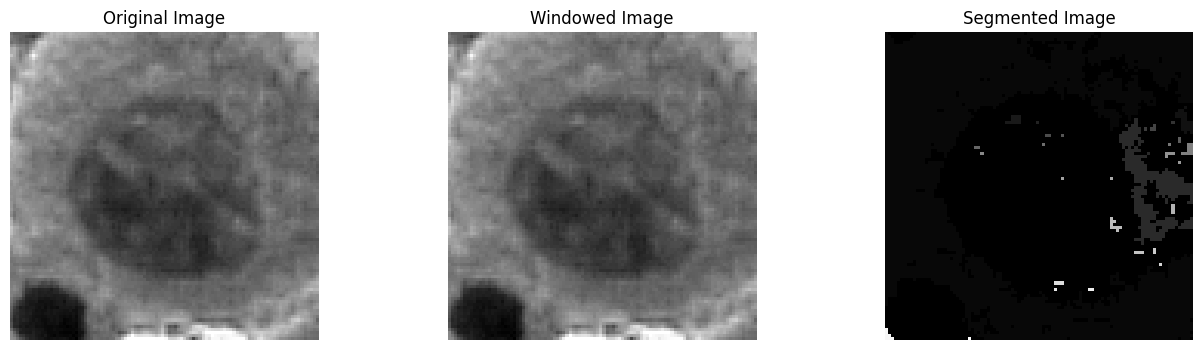

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_simple(image_path, threshold_value):
    # Aplica a limiarização simples
    _, segmented_image = cv2.threshold(image_path, threshold_value, 255, cv2.THRESH_BINARY)
    return segmented_image

image = cv2.imread('../images-processed/ASC-H/11471.png')
# Converter a imagem PIL para numpy array
image_np = np.array(image)

# Converter a imagem para tons de cinza
gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
equalized_image = cv2.equalizeHist(blurred_image)

for i in range(50, 255):
    print(f'AQUIIIIIIIIIIIIIIIIIIII {i}')
    # Exemplo de uso
    segmented_img = segment_image_simple(equalized_image, i)

    # Etapa de rotulagem dos componentes conectados
    _, labels = cv2.connectedComponents(segmented_img)

    # Plot da imagem original e da imagem segmentada com rótulos em tons de cinza
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')  # Display the grayscale image
    plt.title('Imagem Original (Tons de Cinza)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(labels, cmap='gray')  # Display the labeled segmented regions
    plt.title('Imagem Segmentada e Rotulada')
    plt.axis('off')

    plt.show()
